#  ***Load DataSet ***

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Netflix Userbase.csv to Netflix Userbase.csv


**Import Libraries **

In [2]:
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv("Netflix Userbase.csv")
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [5]:
df.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


In [6]:
df.isnull().sum()

,0
User ID,0
Subscription Type,0
Monthly Revenue,0
Join Date,0
Last Payment Date,0
Country,0
Age,0
Gender,0
Device,0
Plan Duration,0


In [7]:
df.duplicated().sum()

0

you can see no null value and no duplicated value in data set

In [8]:
# Unique values in every column
for i in df:
  print("Number of unique values in" , i,  " is -->>" , df[i].nunique())

Number of unique values in User ID  is -->> 2500
Number of unique values in Subscription Type  is -->> 3
Number of unique values in Monthly Revenue  is -->> 6
Number of unique values in Join Date  is -->> 300
Number of unique values in Last Payment Date  is -->> 26
Number of unique values in Country  is -->> 10
Number of unique values in Age  is -->> 26
Number of unique values in Gender  is -->> 2
Number of unique values in Device  is -->> 4
Number of unique values in Plan Duration  is -->> 1


In [9]:
df

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


# **Data Analysis and Visualization**

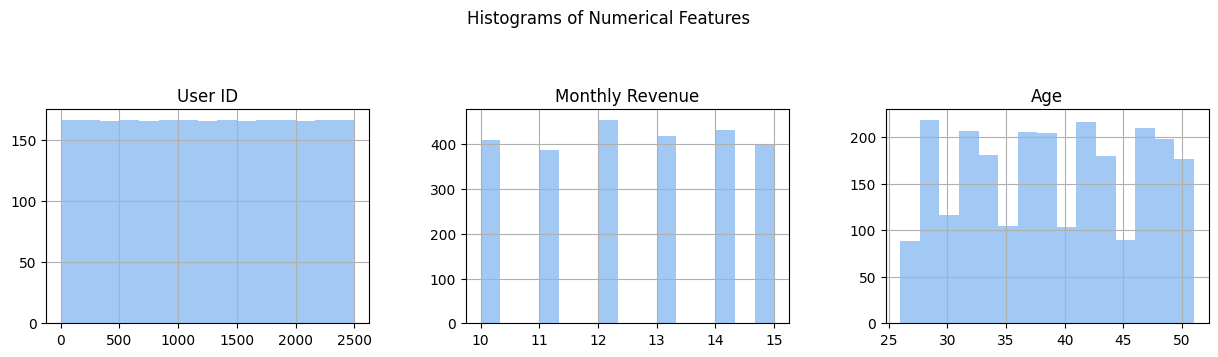

In [10]:
# Histograms for numerical features with a color palette
colors = sns.color_palette("pastel")  # Use a pastel color palette
df.hist(bins=15, figsize=(15, 10), layout=(3, 3), color=colors[0])  # Adjust layout as needed
plt.suptitle('Histograms of Numerical Features')
plt.show()




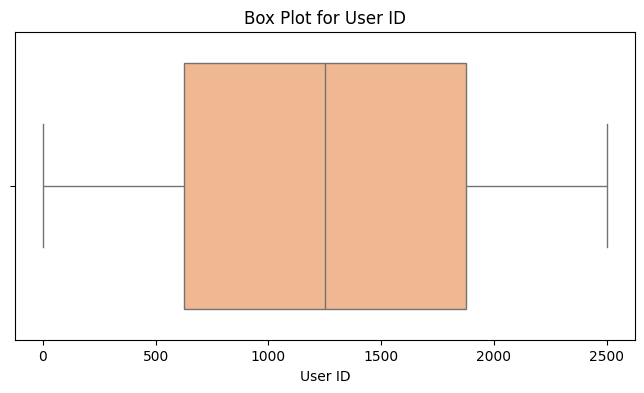

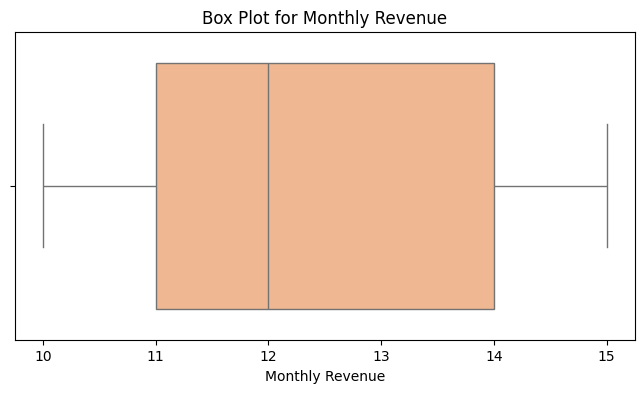

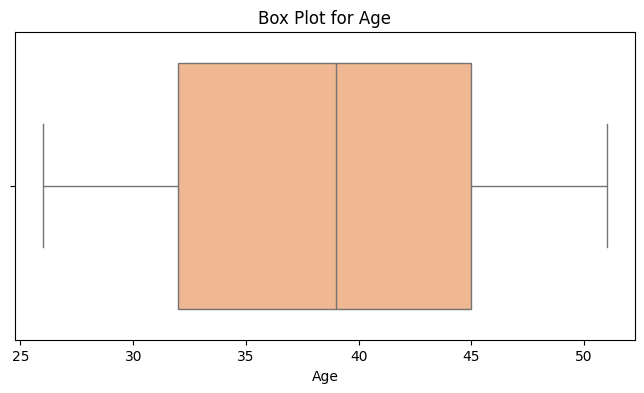

In [11]:
# Box plots for numerical features to check for outliers
for column in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column], color=colors[1])  # Use a different color for box plots
    plt.title(f'Box Plot for {column}')
    plt.show()

No OutLiers

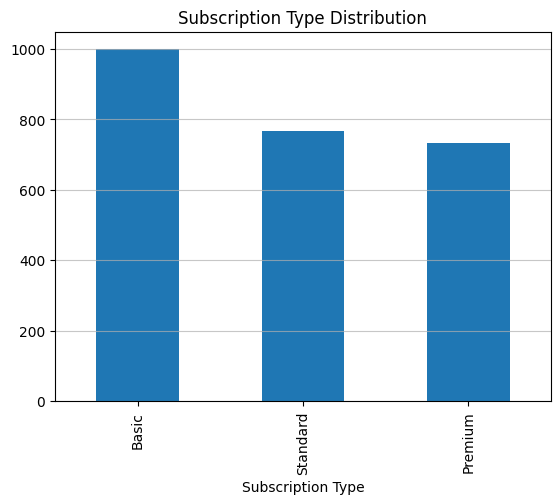

In [12]:
df["Subscription Type"].value_counts().plot(kind = "bar")
plt.title("Subscription Type Distribution")
plt.grid(axis ='y' , linestyle="-" , alpha=0.7 )
plt.show()

In [13]:
# Subscription Type
df["Subscription Type"].value_counts()

,count
Subscription Type,
Basic,999
Standard,768
Premium,733


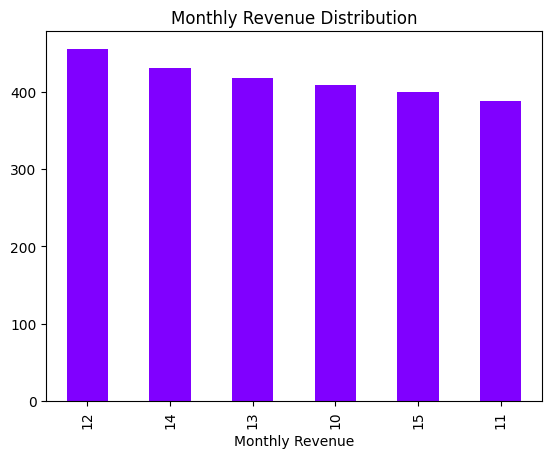

In [14]:
# Monthly Revenue
df["Monthly Revenue"].value_counts().plot(kind ="bar" , cmap="rainbow")
plt.title("Monthly Revenue Distribution")
plt.show()

In [15]:
df["Monthly Revenue"].value_counts()

,count
Monthly Revenue,
12,455
14,431
13,418
10,409
15,399
11,388


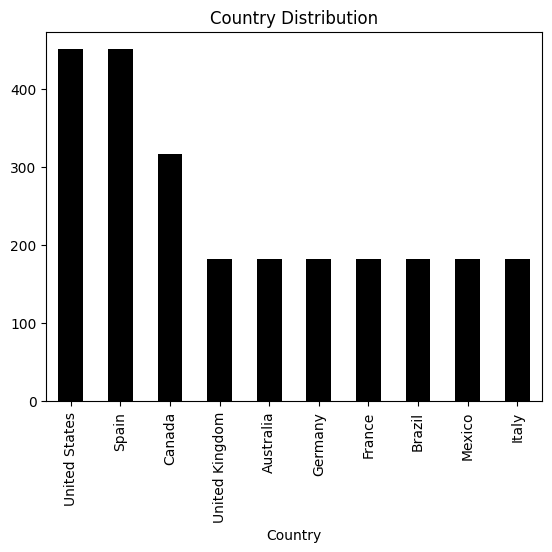

In [16]:
df["Country"].value_counts().plot(kind = "bar" , cmap="copper")
plt.title("Country Distribution")
plt.show()

More Netflix User in  "United State and spain"

In [17]:
df["Country"].value_counts()

,count
Country,
United States,451
Spain,451
Canada,317
United Kingdom,183
Australia,183
Germany,183
France,183
Brazil,183
Mexico,183


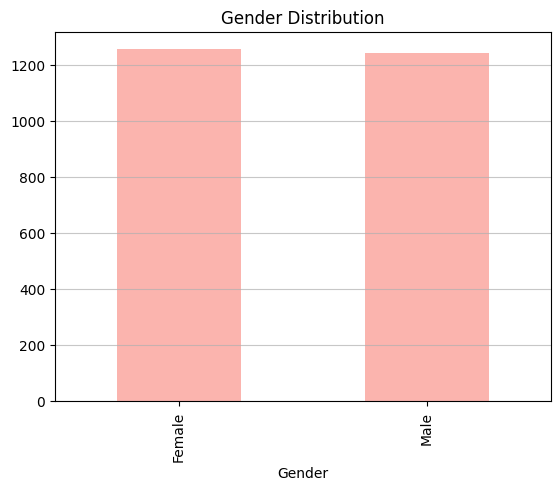

In [18]:
df["Gender"].value_counts().plot(kind = "bar" , cmap="Pastel1")
plt.title("Gender Distribution")
plt.grid(axis ='y' , linestyle="-" , alpha=0.7 )
plt.show()

In [19]:
df["Gender"].value_counts()

,count
Gender,
Female,1257
Male,1243


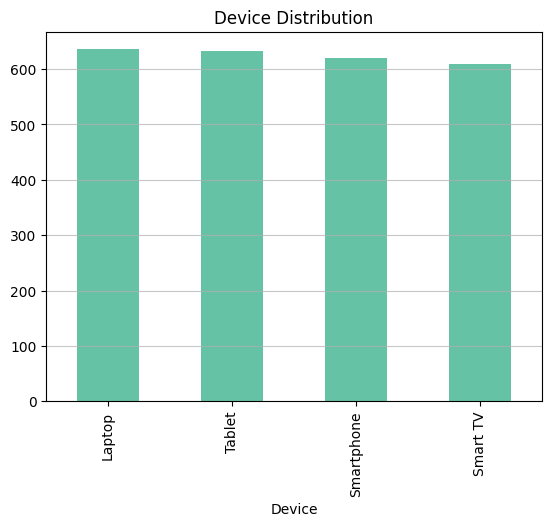

In [20]:
# Device
df["Device"].value_counts().plot(kind = "bar" , cmap="Set2")
plt.title("Device Distribution")
plt.grid(axis ='y' , linestyle="-" , alpha=0.7 )
plt.show()

In [21]:
df["Device"].value_counts()

,count
Device,
Laptop,636
Tablet,633
Smartphone,621
Smart TV,610


**Breakdown of different subscription types by country**

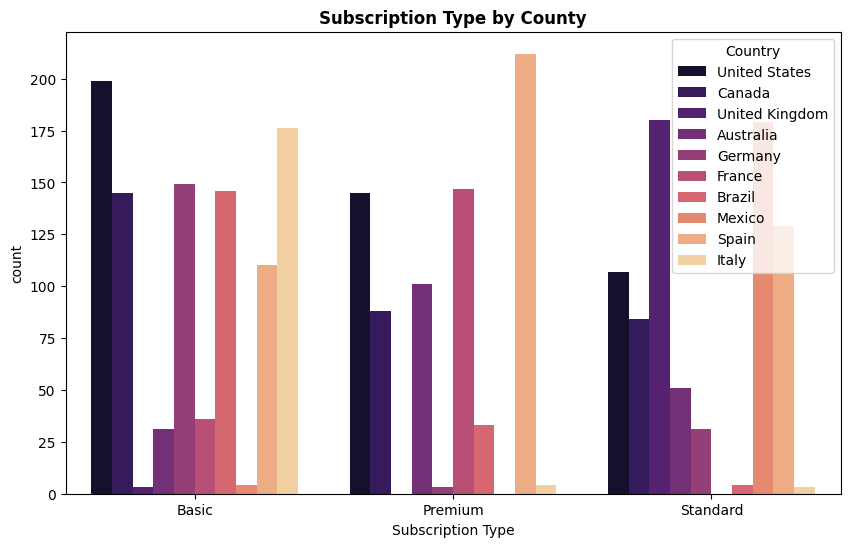

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(x=df["Subscription Type"] , hue = df["Country"] , palette='magma')
plt.title("Subscription Type by County" , fontweight ="bold" )
plt.show()

In [23]:
subs_by_country = pd.pivot_table(index = "Country" , columns="Subscription Type" , values="User ID" , aggfunc="count" ,data=df)
subs_by_country["Total"] = subs_by_country.sum(axis =1)
subs_by_country = subs_by_country.sort_values("Total" , ascending = False)
subs_by_country

Subscription Type,Basic,Premium,Standard,Total
Country,,,,
Spain,110.0,212.0,129.0,451.0
United States,199.0,145.0,107.0,451.0
Canada,145.0,88.0,84.0,317.0
Australia,31.0,101.0,51.0,183.0
Brazil,146.0,33.0,4.0,183.0
France,36.0,147.0,NaN,183.0
Germany,149.0,3.0,31.0,183.0
Italy,176.0,4.0,3.0,183.0
Mexico,4.0,NaN,179.0,183.0


**Breakdown of different subscription types by gender**

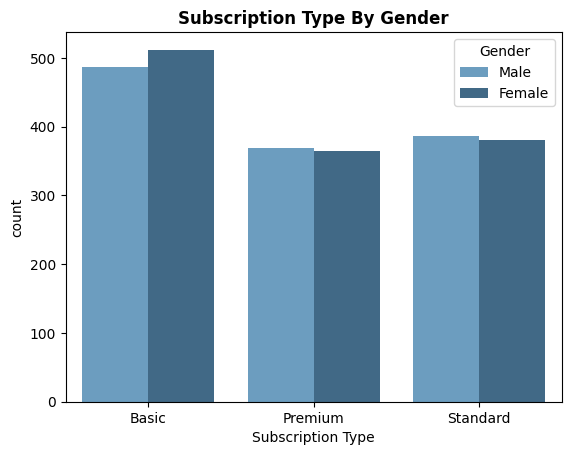

In [24]:
# Subscription Type by Gender
sns.countplot(x= df["Subscription Type"] , hue =df["Gender"] , palette="Blues_d")
plt.title("Subscription Type By Gender" , fontweight="bold")
plt.show()

In [25]:
subs_by_gender = pd.pivot_table(index = "Gender" , columns = "Subscription Type" , values = "User ID" , aggfunc ="count" ,data=df )
subs_by_gender["Total"] = subs_by_gender.sum(axis = 1)
subs_by_gender = subs_by_gender.sort_values("Total" , ascending = False)
subs_by_gender

Subscription Type,Basic,Premium,Standard,Total
Gender,,,,
Female,512,364,381,1257
Male,487,369,387,1243


In [26]:
sub_by_gender = pd.pivot_table(index = ["Country" ,"Gender"] , columns="Subscription Type" , values="User ID"  , aggfunc="count" ,data=df )
sub_by_gender["Total"] = sub_by_gender.sum(axis=1)
subs_by_gender = subs_by_gender.sort_values("Total" , ascending = False)
sub_by_gender

Subscription Type      Basic  Premium  Standard  Total
Country        Gender                                 
Australia      Female   16.0     45.0      28.0   89.0
               Male     15.0     56.0      23.0   94.0
Brazil         Female   78.0     16.0       1.0   95.0
               Male     68.0     17.0       3.0   88.0
Canada         Female   68.0     40.0      49.0  157.0
               Male     77.0     48.0      35.0  160.0
France         Female   17.0     74.0       NaN   91.0
               Male     19.0     73.0       NaN   92.0
Germany        Female   80.0      1.0      13.0   94.0
               Male     69.0      2.0      18.0   89.0
Italy          Female   86.0      3.0       2.0   91.0
               Male     90.0      1.0       1.0   92.0
Mexico         Female    2.0      NaN      87.0   89.0
               Male      2.0      NaN      92.0   94.0
Spain          Female   60.0    113.0      60.0  233.0
               Male     50.0     99.0      69.0  218.0
United Kingdom Female    2.0      NaN      91.0   93.0
               Male      1.0      NaN      89.0   90.0
United States  Female  103.0     72.0      50.0  225.0
               Male     96.0     73.0      57.0  226.0

  **Monthly Revenue Analysis**

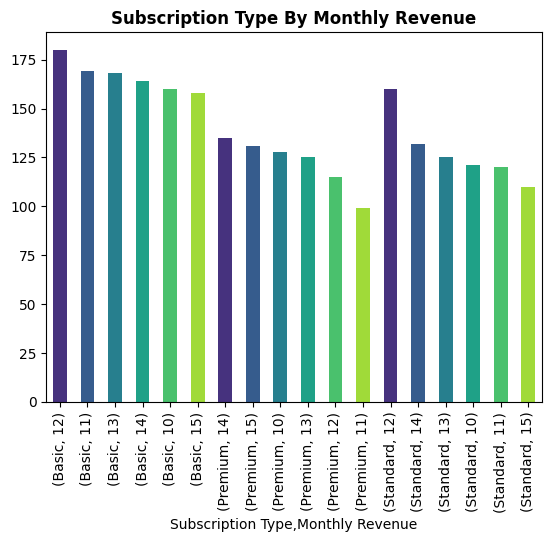

In [27]:
import seaborn as sns

# Generate a color palette with exactly 6 colors
colors = sns.color_palette("viridis", 6)

# Monthly Revenue based on Subscription Type
df.groupby("Subscription Type")["Monthly Revenue"].value_counts().plot(kind="bar", color=colors)
plt.title("Subscription Type By Monthly Revenue", fontweight="bold")
plt.show()


In [28]:
revenue_Sub = pd.pivot_table(index = "Subscription Type" , columns = "Monthly Revenue" , values = "User ID" , aggfunc ="count" ,data = df)
revenue_Sub["Total"] = revenue_Sub.sum(axis=1)
revenue_Sub

Monthly Revenue,10,11,12,13,14,15,Total
Subscription Type,,,,,,,
Basic,160,169,180,168,164,158,999
Premium,128,99,115,125,135,131,733
Standard,121,120,160,125,132,110,768


In [29]:
df.groupby("Subscription Type")["Monthly Revenue"].value_counts()

Subscription Type  Monthly Revenue
Basic              12                 180
                   11                 169
                   13                 168
                   14                 164
                   10                 160
                   15                 158
Premium            14                 135
                   15                 131
                   10                 128
                   13                 125
                   12                 115
                   11                  99
Standard           12                 160
                   14                 132
                   13                 125
                   10                 121
                   11                 120
                   15                 110
Name: count, dtype: int64

In Basic Monthly Revenue 12 have more range ,
In Premium Monthly Revenue 14 have more range ,
In Standard Monthly Revenue 12 have more range ,

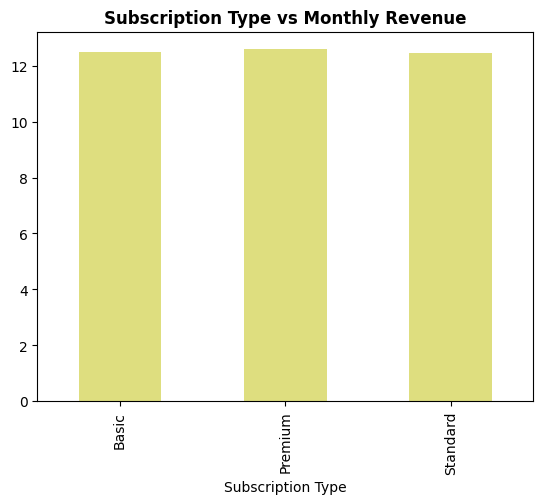

In [30]:
df.groupby("Subscription Type")["Monthly Revenue"].mean().plot(kind="bar" ,color= "y" , alpha=0.5)
plt.title("Subscription Type vs Monthly Revenue" , fontweight="bold")
plt.show()

In [31]:
df.groupby("Subscription Type")["Monthly Revenue"].mean()

,Monthly Revenue
Subscription Type,
Basic,12.481481
Premium,12.590723
Standard,12.464844


Monthly Revenue average is almost same in all Subsciption Type

**monthly revenue based on age groups**

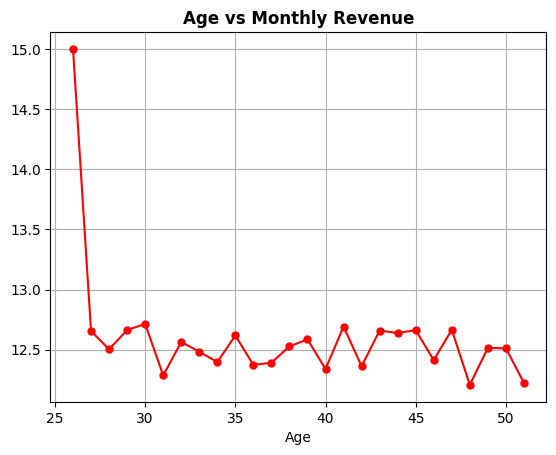

In [32]:
df.groupby("Age")["Monthly Revenue"].mean().plot(kind="line" , marker='o' , ms=5 ,color="red")
plt.title("Age vs Monthly Revenue" , fontweight="bold")
plt.grid()
plt.show()

In [33]:
df.groupby("Age")["Monthly Revenue"].mean()

,Monthly Revenue
Age,
26,15.000000
27,12.655172
28,12.504348
29,12.663462
30,12.715517
31,12.286957
32,12.565217
33,12.483871
34,12.397727


**monthly revenue based on device types**

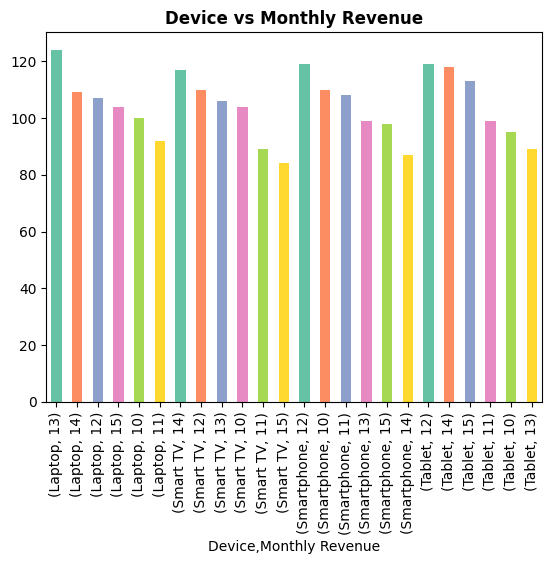

In [34]:
colors = sns.color_palette("Set2",6)
df.groupby("Device")["Monthly Revenue"].value_counts().plot(kind="bar", color=colors)
plt.title("Device vs Monthly Revenue",fontweight="bold")
plt.show()

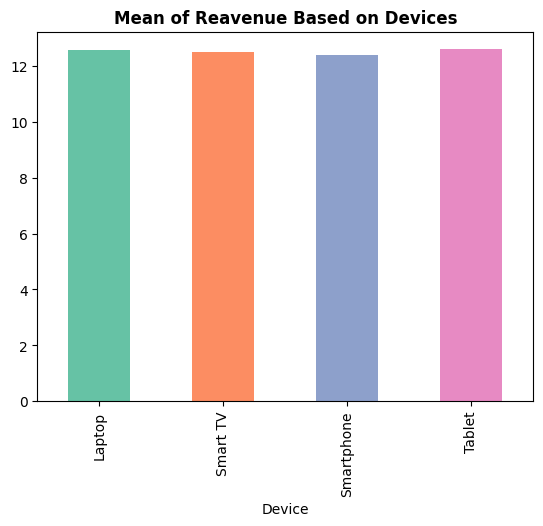

In [35]:
colos = sns.color_palette("Set1")
# Plot
df.groupby("Device")["Monthly Revenue"].mean().plot(kind="bar" ,color=colors)
# Set Title
plt.title("Mean of Reavenue Based on Devices" , fontweight="bold")
plt.show()

In [36]:
df.groupby("Device")["Monthly Revenue"].mean()

,Monthly Revenue
Device,
Laptop,12.569182
Smart TV,12.483607
Smartphone,12.384863
Tablet,12.592417


In [37]:
revenue_by_devices = pd.pivot_table(index ="Device" ,columns ="Monthly Revenue" , values = 'User ID' , aggfunc="count" , data =df)
revenue_by_devices["Total"] = revenue_by_devices.sum(axis=1)
revenue_by_devices =revenue_by_devices.sort_values("Total" , ascending=False)
revenue_by_devices

Monthly Revenue,10,11,12,13,14,15,Total
Device,,,,,,,
Laptop,100,92,107,124,109,104,636
Tablet,95,99,119,89,118,113,633
Smartphone,110,108,119,99,87,98,621
Smart TV,104,89,110,106,117,84,610


**Join Date Insights**

**convert in Date and Time**

In [38]:
df["Join Date"] = pd.to_datetime(df["Join Date"], format='%d-%m-%y')
df["Last Payment Date"] = pd.to_datetime(df["Last Payment Date"], format='%d-%m-%y')

In [39]:
# How Many Months User Stay
df["Duraton in month"] = ((df["Last Payment Date"] - df["Join Date"]).dt.days) / 30

In [40]:
df["Duraton in month"].mean()

10.287306666666666

**Average Duration is 10-11 month whixh is**

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            2500 non-null   int64         
 1   Subscription Type  2500 non-null   object        
 2   Monthly Revenue    2500 non-null   int64         
 3   Join Date          2500 non-null   datetime64[ns]
 4   Last Payment Date  2500 non-null   datetime64[ns]
 5   Country            2500 non-null   object        
 6   Age                2500 non-null   int64         
 7   Gender             2500 non-null   object        
 8   Device             2500 non-null   object        
 9   Plan Duration      2500 non-null   object        
 10  Duraton in month   2500 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(3), object(5)
memory usage: 215.0+ KB


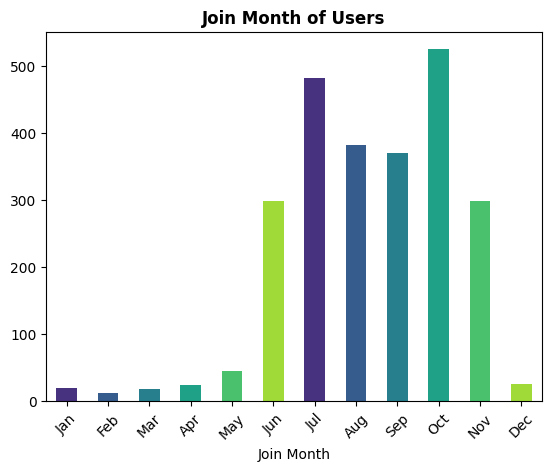

In [42]:
# on which month most User Joined netflix
colors = sns.color_palette("viridis")
# plot bar
join_month_counts = df["Join Date"].dt.month.value_counts().sort_index()

join_month_counts.plot(kind="bar" , color=colors)
# Set a Title
plt.title("Join Month of Users" , fontweight = "bold")
plt.xlabel("Join Month")
plt.xticks(range(12) , labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=45)
plt.show()

**You can see most user join netflix in Jun-Nov have more joinning months**
**Starting of the year is not good for netflix**

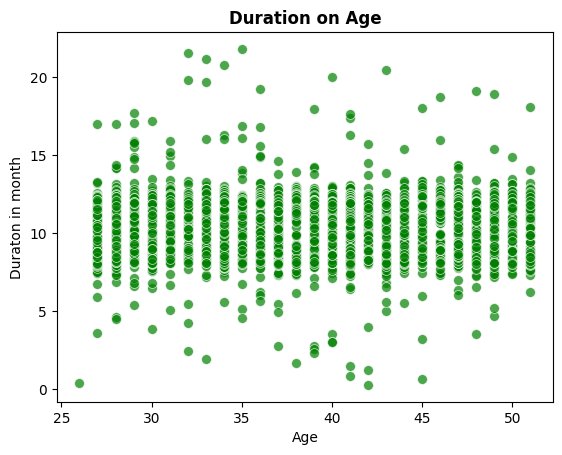

In [43]:
# Scatter plot for "Age and Duration in month" distribution
sns.scatterplot(x="Age" , y="Duraton in month" , s = 50 , alpha=.7 , data=df , color='green')
# Set a title
plt.title("Duration on Age" , fontweight="bold")
plt.show()

In [44]:
df["Join Date"].dt.month.value_counts().sort_index()

,count
Join Date,
1,20
2,12
3,19
4,24
5,45
6,298
7,481
8,382
9,370


In [45]:
df["Join Date"].dt.year.value_counts()

,count
Join Date,
2022,2448
2023,38
2021,14


**You can see 2021 and 20023 data is missing this data set based on 2022 more**

**most popular devices used by users in different countries**

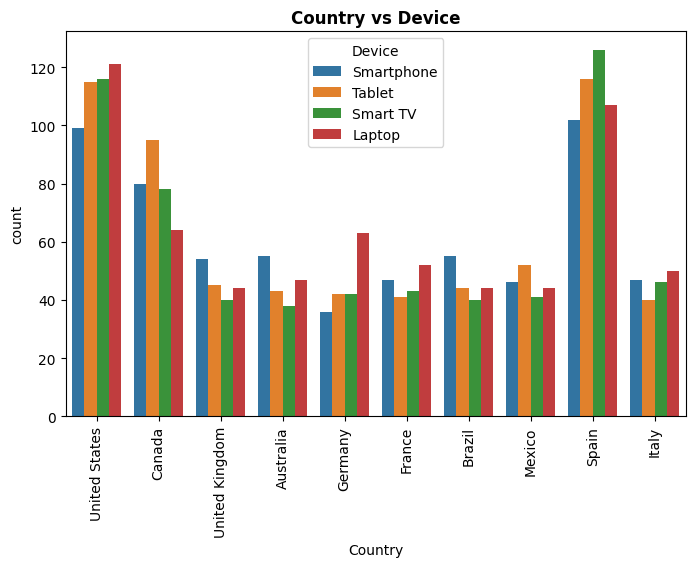

In [46]:
# Set figure size
plt.figure(figsize=(8,5))
# Plot a countplot
sns.countplot(x=df["Country"] , hue =df["Device"])
#  set title
plt.title("Country vs Device" , fontweight="bold")
plt.xticks(rotation=90)
plt.show()

In [47]:
# Devices Used By Each Country
Device_by_country = pd.pivot_table(index="Country" , columns="Device" ,values="User ID",aggfunc="count",data=df)
# Create a Total name of column in which all valuues
Device_by_country["Total"]=Device_by_country.sum(axis=1)
Device_by_country = Device_by_country.sort_values("Total" , ascending = False)
Device_by_country

Device,Laptop,Smart TV,Smartphone,Tablet,Total
Country,,,,,
Spain,107,126,102,116,451
United States,121,116,99,115,451
Canada,64,78,80,95,317
Australia,47,38,55,43,183
Brazil,44,40,55,44,183
France,52,43,47,41,183
Germany,63,42,36,42,183
Italy,50,46,47,40,183
Mexico,44,41,46,52,183


**Revenue Growth Trends over time by Subsciption**

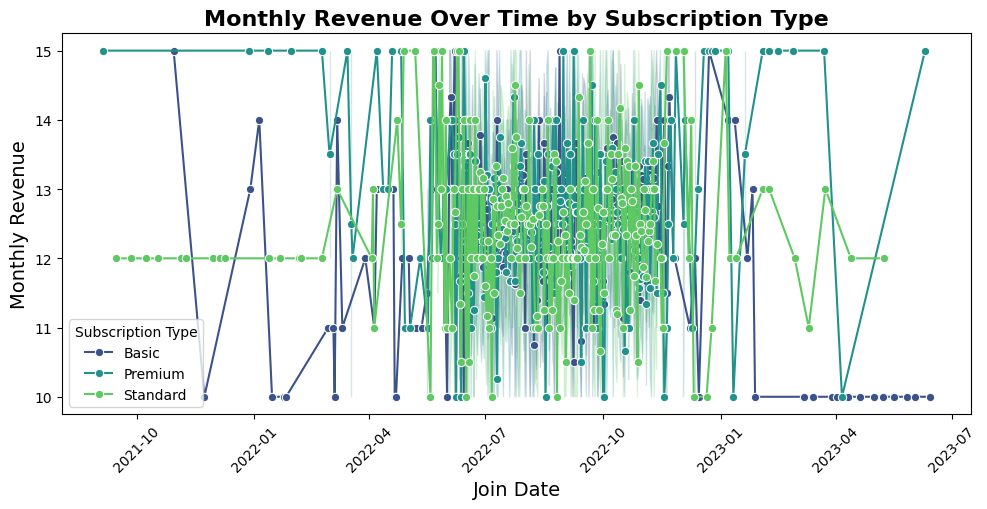

In [48]:
plt.figure(figsize=(10, 5.2))
# Plot
sns.lineplot(x="Join Date", y="Monthly Revenue", hue="Subscription Type", data=df, marker='o', palette="viridis")
# Set Labels and Title
plt.title("Monthly Revenue Over Time by Subscription Type", fontsize=16, fontweight='bold')
plt.xlabel("Join Date", fontsize=14)
plt.ylabel("Monthly Revenue", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-ticks for readability
plt.legend(title="Subscription Type")

plt.tight_layout()
plt.show()


**average plan duration by subscription type**

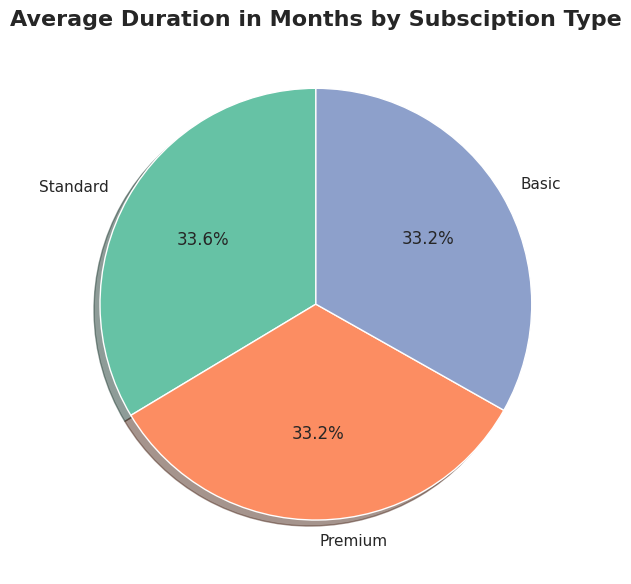

In [49]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Calculate the average duration by Subsciption Type and sort in descending order
avg_duration = df.groupby("Subscription Type")["Duraton in month"].mean().sort_values(ascending=False)

# Plot as a pie chart
plt.figure(figsize=(8, 6))
colors = sns.color_palette("Set2", len(avg_duration))  # Using a colorful palette

# Create the pie chart with enhanced details
avg_duration.plot(kind="pie", autopct='%1.1f%%', startangle=90, colors=colors, shadow=True)
plt.ylabel('')  # Remove the y-label for a cleaner look
plt.title("Average Duration in Months by Subsciption Type", fontsize=16, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()


In [50]:
df.groupby("Subscription Type")["Duraton in month"].mean().sort_values(ascending=False)

,Duraton in month
Subscription Type,
Standard,10.377604
Premium,10.252387
Basic,10.243510


**average plan duration by Country**

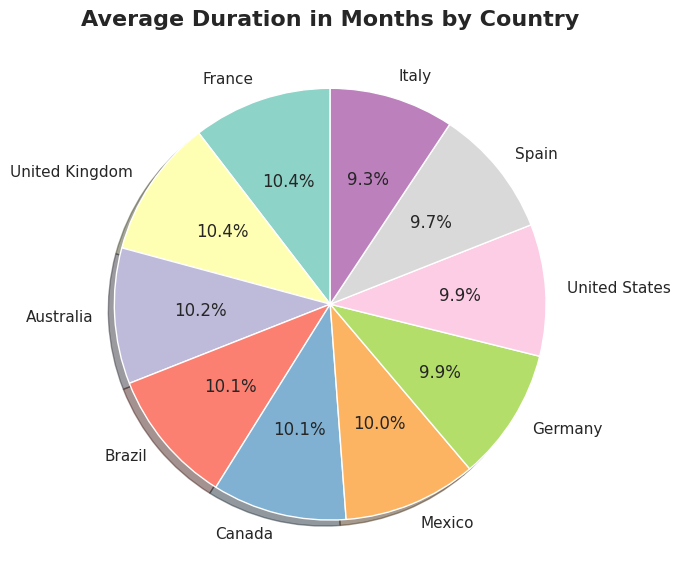

In [51]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Calculate the average duration by country and sort in descending order
avg_duration = df.groupby("Country")["Duraton in month"].mean().sort_values(ascending=False)

# Plot as a pie chart
plt.figure(figsize=(8, 6))
colors = sns.color_palette("Set3", len(avg_duration))  # Using a colorful palette

# Create the pie chart with enhanced details
avg_duration.plot(kind="pie", autopct='%1.1f%%', startangle=90, colors=colors, shadow=True)
plt.ylabel('')  # Remove the y-label for a cleaner look
plt.title("Average Duration in Months by Country", fontsize=16, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()


In [52]:
df.groupby("Country")["Duraton in month"].mean().sort_values(ascending=False)

,Duraton in month
Country,
France,10.774135
United Kingdom,10.718944
Australia,10.518215
Brazil,10.473042
Canada,10.403470
Mexico,10.340801
Germany,10.267577
United States,10.196674
Spain,10.001035


**You can see United state and Spain have more user but France and united kingdom and australia have more duration of user on netflix**

In [53]:
df["Last Payment Date"].unique()

<DatetimeArray>
['2023-06-10 00:00:00', '2023-06-22 00:00:00', '2023-06-27 00:00:00',
 '2023-06-26 00:00:00', '2023-06-28 00:00:00', '2023-06-25 00:00:00',
 '2023-06-24 00:00:00', '2023-06-23 00:00:00', '2023-06-20 00:00:00',
 '2023-06-29 00:00:00', '2023-06-30 00:00:00', '2023-07-01 00:00:00',
 '2023-07-02 00:00:00', '2023-07-03 00:00:00', '2023-07-04 00:00:00',
 '2023-07-05 00:00:00', '2023-07-06 00:00:00', '2023-07-07 00:00:00',
 '2023-07-08 00:00:00', '2023-07-09 00:00:00', '2023-07-10 00:00:00',
 '2023-07-11 00:00:00', '2023-07-12 00:00:00', '2023-07-13 00:00:00',
 '2023-07-14 00:00:00', '2023-07-15 00:00:00']
Length: 26, dtype: datetime64[ns]

In [54]:
# Set the churn threshold in days
churn_threshold_days = 485

# Calculate the days since the last payment
df['Days Since Last Payment'] = (datetime.now() - df['Last Payment Date']).dt.days

# Define churned users
df['Churned'] = df['Days Since Last Payment'] > churn_threshold_days

In [55]:
# Calculate churn rate
total_users = df['User ID'].nunique()
churned_users = df['Churned'].sum()
churn_rate = (churned_users / total_users) * 100

print(f"Churn Rate: {churn_rate:.2f}%")

Churn Rate: 50.88%


# **Feature Engineering**

In [56]:
df["Subscription Tenure"] = (df["Last Payment Date"] - df["Join Date"]).dt.days

In [57]:
df['Avg Monthly Revenue'] = df['Monthly Revenue'] / (df['Subscription Tenure'] / 30)

In [58]:
bins = [0,18,25,35,45,60,100]
labels = ["<18" , "19-25" , "26-35","36-45","46-60" ,"60+"]

df["Age Group"] = pd.cut(df["Age"] , bins=bins , labels=labels)

In [59]:
df.head(5)

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Duraton in month,Days Since Last Payment,Churned,Subscription Tenure,Avg Monthly Revenue,Age Group
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month,17.033333,509,True,511,0.587084,26-35
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,21.833333,497,True,655,0.687023,26-35
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,3.966667,492,True,119,3.025210,36-45
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month,11.700000,493,True,351,1.025641,46-60
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month,1.933333,491,True,58,5.172414,26-35


In [60]:
#

#  **Model Train**

In [61]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
label = LabelEncoder()

In [62]:
df["Device"]=label.fit_transform(df["Device"])
df["Churned"]=label.fit_transform(df["Churned"])
df["Age Group"]=label.fit_transform(df["Age Group"])

In [63]:
x=df[["Device" , "Age Group","Subscription Tenure" , "Days Since Last Payment" , "Avg Monthly Revenue"]]
y=df["Churned"]

In [64]:
x

,Device,Age Group,Subscription Tenure,Days Since Last Payment,Avg Monthly Revenue
0,2,0,511,509,0.587084
1,3,0,655,497,0.687023
2,1,1,119,492,3.025210
3,0,2,351,493,1.025641
4,2,0,58,491,5.172414
...,...,...,...,...,...
2495,1,0,352,477,1.193182
2496,1,0,344,475,1.308140
2497,0,1,340,474,1.058824
2498,3,2,334,477,1.167665


In [65]:
y

,Churned
0,1
1,1
2,1
3,1
4,1
...,...
2495,0
2496,0
2497,0
2498,0


In [66]:
x_train,x_test,y_train,y_test =train_test_split(x,y , test_size=0.2 , random_state=42)

In [68]:
print("Training set size:", x_train.shape)
print("Test set size:", x_test.shape)

Training set size: (2000, 5)
Test set size: (500, 5)


**Standardization**

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [70]:
# Apply StandardScaler
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [71]:
# standardization give a value in array  covert in data frame
x_train = pd.DataFrame(x_train , columns=x.columns)
x_test = pd.DataFrame(x_test , columns=x.columns)

**Logistic Regression**

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
model = LogisticRegression(max_iter=1000)
model.fit(x_train , y_train)

LogisticRegression(max_iter=1000)

In [73]:
y_pred = model.predict(x_test)

In [74]:
print(classification_report(y_pred , y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       254
           1       1.00      1.00      1.00       246

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



**Data is well Seperated therefor this giving a 100% accuacy**

 ***Decision Tree***

In [76]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train , y_train)

DecisionTreeClassifier()

In [77]:
y_pred = dt_model.predict(x_test)

In [78]:
print(classification_report(y_pred , y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       254
           1       1.00      1.00      1.00       246

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



In [79]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [80]:
y_pred3 = rf_model.predict(x_test)

In [81]:
print(classification_report(y_pred3 , y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       254
           1       1.00      1.00      1.00       246

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500

